In [1]:
import numpy as np
import os
import pathlib
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time

In [2]:

batch_size = 64
img_height = 224
img_width = 224
epochs=20
num_classes = 5
num_of_test_samples = 1050
# set data directory
data_dir = pathlib.Path('D:/BaiTap/DoAnTotNghiep/dataset/')

In [ ]:
# display dataset information -- this step is optional
print('Training:')
print('Total # of Pepper bell Bacterial spot images: ', len(list(data_dir.glob('training/Pepper__bell___Bacterial_spot/*.jpg')))) #Benh dom la vi khan ot
print('Total # of Pepper__bell___healthy images: ', len(list(data_dir.glob('training/Pepper__bell___healthy/*.jpg')))) #La ot khoe manh
print('Total # of Potato___Early_blight images: ', len(list(data_dir.glob('training/Potato___Early_blight/*.jpg')))) #Benh chay la khoai tay
print('Total # of Potato___Late_blight images: ', len(list(data_dir.glob('training/Potato___Late_blight/*.jpg')))) 
print('Total # of Tomato__Target_Spot images: ', len(list(data_dir.glob('training/Tomato__Target_Spot/*.jpg')))) 

print('Testing:')
print('Total # of Pepper bell Bacterial spot images: ', len(list(data_dir.glob('testing/Pepper__bell___Bacterial_spot/*.jpg')))) 
print('Total # of Pepper__bell___healthy images: ', len(list(data_dir.glob('testing/Pepper__bell___healthy/*.jpg')))) 
print('Total # of Potato___Early_blight images: ', len(list(data_dir.glob('testing/Potato___Early_blight/*.jpg')))) 
print('Total # of Potato___Late_blight images: ', len(list(data_dir.glob('testing/Potato___Late_blight/*.jpg')))) 
print('Total # of Tomato__Target_Spot images: ', len(list(data_dir.glob('testing/Tomato__Target_Spot/*.jpg')))) 

In [3]:
# using tf.keras.preprocessing to load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(data_dir, 'training'),
    validation_split=0.2, 
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(data_dir, 'training'),
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# load testing data
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(data_dir, 'testing'),
    image_size=(img_height, img_width),
    batch_size=num_of_test_samples)
# display all class names -- this step is optional

class_names = train_ds.class_names
print(class_names)

Found 5879 files belonging to 5 classes.
Using 4704 files for training.
Found 5879 files belonging to 5 classes.
Using 1175 files for validation.
Found 1049 files belonging to 5 classes.
['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Tomato__Target_Spot']


In [ ]:
plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


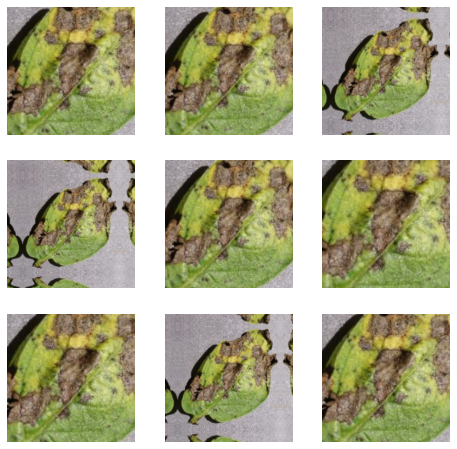

In [8]:
# Define data augmentation layer
data_augmentation = keras.Sequential([
    # # layers.experimental.preprocessing.RandomFlip("horizontal",
    # #                 input_shape=(img_height, img_width, 3)),
    # layers.experimental.preprocessing.RandomRotation(0.5),
    layers.experimental.preprocessing.RandomZoom(0.5)
])
# Let's visualize what a few augmented examples look like by
# applying data augmentation to the same image several times
# this step is optional
plt.figure(figsize=(8, 8))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+ 1)
        plt.imshow(augmented_images[1].numpy().astype("uint8") )
        plt.axis("off")

In [ ]:
model = keras.models.Sequential([
    data_augmentation,
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=[ 'accuracy' ])
model. summary ()

In [ ]:
# Training
start_time = time.time()

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

training_time = (time.time() - start_time)/60
print("---Training time: %s minutes ---" % training_time)


In [ ]:
# Visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# save model
model_path = pathlib.Path('/BaiTap/DoAnTotNghiep/vgg16/')
model.save(os.path.join(model_path,'vg166.h5'))

In [ ]:

# load the model
model_path = pathlib.Path('/BaiTap/DoAnTotNghiep/vgg16/')
flower_model = keras.models.load_model(os.path.join(model_path, 'vg166.h5'))


In [ ]:
# evaluate the model
_, accuracy_train = flower_model.evaluate(train_ds, verbose=1)
print( 'Accuracy on the train set: %.2f' % (accuracy_train*100)+'%')

In [ ]:
_, accuracy_test = flower_model.evaluate(test_ds, verbose=1)
print( 'Accuracy on the train set: %.2f' % (accuracy_test*100)+'%')

In [ ]:
# specify test image filename
test_img_fn = os.path.join(data_dir, 'testing/Pepper__bell___healthy/3edf7c3f-73e0-439c-870d-76cfd7c3bc45___RS_HL 1859.jpg')

# read image
img = keras.preprocessing.image.load_img(
    test_img_fn, target_size=(img_height, img_width))

# convert image into array
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

# apply the model to predict
prob = flower_model.predict(img_array)
predicted_class = class_names[np.argmax(prob)]

# display the result
print('Predicted class: ', predicted_class, '(Probability = ', np.max(prob), ')')